In [1]:
import re
import pandas as pd
import math
from itertools import combinations

import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

In [2]:
def extract_point(line):
    # position=<-2,  3> velocity=< 1,  0>
    regex = 'position=<\s*(.*),\s*(.*)> velocity=<\s*(.*),\s*(.*)>'
    (x,y,x_vel,y_vel) = list(map(int,re.findall(regex,line)[0]))
    return {'x':x,'y':y * -1,'x_vel':x_vel,'y_vel':y_vel * -1}

In [3]:
def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [4]:
def get_average_distance(point_frame):
    x = point_frame['x'].values
    y = point_frame['y'].values
    points = list(zip(x,y))
    distances = [dist(p1, p2) for p1, p2 in combinations(points, 2)]
    avg_distance = sum(distances) / len(distances)
    return(avg_distance)

In [5]:
def get_line_weight(point_frame):
    line_weight = 0
    for (x,count) in point_frame['x'].value_counts().iteritems():
        if count > 3:
            y_matches = sorted(point_frame[point_frame['x'] == x]['y'].values)
            avg_delta = sum([abs(val - y_matches[i +1]) for (i,val) in enumerate(y_matches[:-1])]) / (len(y_matches) - 1)
            line_weight += count / avg_delta

    for (y,count) in point_frame['y'].value_counts().iteritems():
        if count > 3:
            x_matches = sorted(point_frame[point_frame['y'] == y]['x'].values)
            avg_delta = sum([abs(val - x_matches[i +1]) for (i,val) in enumerate(x_matches[:-1])]) / (len(x_matches) - 1)
            line_weight += count / avg_delta
    return (line_weight)

In [6]:
def update_point_locations(point_frame,multiplier=1):
    point_frame['x'] = point_frame['x'] + point_frame['x_vel'] * multiplier
    point_frame['y'] = point_frame['y'] + point_frame['y_vel'] * multiplier

In [7]:
def plot_points(point_frame):
    rcParams['figure.figsize'] = 18, 3
    plt.close()
    plt.scatter(point_frame['x'], point_frame['y'])

Answer 1:


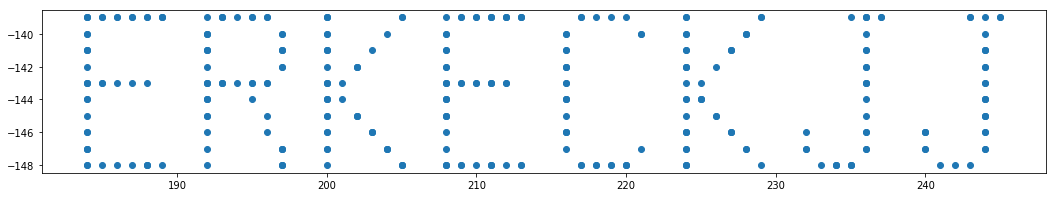

Answer 2:  10645 seconds elapsed


In [8]:
extracted_points = [extract_point(l) for l in open('input.txt','r').readlines()]
point_frame = pd.DataFrame.from_dict(extracted_points)
max_line_weight = 0
min_distance = 100000
seconds_waited = 0
for i in range(25):
    line_weight = get_line_weight(point_frame)
    avg_distance = get_average_distance(point_frame)
    if avg_distance < min_distance:
        min_distance = avg_distance
        if line_weight > max_line_weight and line_weight > .25:
            plot_points(point_frame)
            max_line_weight = line_weight
            final_seconds = seconds_waited
    speedup_factor = int(min_distance // 10 + 1)
    seconds_waited += speedup_factor
    update_point_locations(point_frame,speedup_factor)
print('Answer 1:')
plt.show()
print('Answer 2: ',final_seconds,'seconds elapsed')